In [1]:
import sys
sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
#import pandas as pd
import numpy as np
import cv2
#from PIL import Image
import random
#import tensorflow as tf
#import re
#import datetime
#import io
#from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#import pickle
#from sklearn.model_selection import train_test_split
#from nltk.metrics.distance import edit_distance
#import string
#from utils import generate_token_index
#from utils import score_prediction, generate_token_index, y_labels, generate_dataset
import json
#import keras
import string
import yaml
from PIL import Image, ImageStat

#from data_generator.data_generator import DataGenerator
#from base.base_data_generator import BaseDataGenerator
#from preprocessing.preproc_functions import read_image, normalize_0_mean_1_variance, normalize_0_1, convert_annotation_one_hot, read_annotation
#from keras.applications.vgg16 import preprocess_input
#from scipy.io import loadmat
#from sklearn.preprocessing import OneHotEncoder

from data_generators.data_generator import DataGenerator

%matplotlib inline

In [74]:
with open('../configs/config.yml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    
config['dataset_folder'] = os.path.join('../', config['dataset_folder'])
config['labels_file'] = os.path.join('../', config['labels_file'])

In [75]:
with open(config['labels_file']) as f:
    dataset = json.load(f)

In [83]:
train_generator = DataGenerator(config, dataset['train'], shuffle=True, use_data_augmentation=False)

dataset len 8100 8100
8100
[4344 3837 4011 ... 5200 7466 3399]


In [16]:
batch_x, batch_y = train_generator.__getitem__(0)

query = batch_x[0]
image = batch_x[1]
#annotation = 
#query = (query[0, ...]).astype(np.uint8)
#query = Image.fromarray(query)
print(query.shape)
print(image.shape)

(1, 64, 64, 3)
(1, 256, 256, 3)


### Show query

0.0 1.0


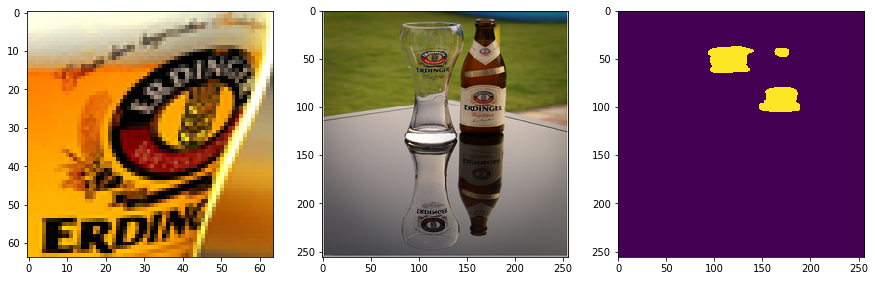

In [17]:
index = random.randint(0, len(query)-1)
fig = plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(query[index, ...])
plt.subplot(1, 3, 2)
plt.imshow(image[index, ...])
plt.subplot(1, 3, 3)
plt.imshow(batch_y[index, ...])

print(np.min(batch_y), np.max(batch_y))

#plt.subplot(1, 2, 2)
#plt.imshow(annotation, cmap=plt.get_cmap('nipy_spectral', config['network']['num_classes']))

plt.show()

In [ ]:
batch_y[index, ...].shape